In [11]:
### Load EDA pkgs
import pandas as pd
import numpy as np

### Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

### Feature selection
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
## Model pkgs
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import cv
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


#hcc_o = pd.read_csv ('./MI.data')
#hcc_o.to_csv ('./MI.csv', index=None)

In [12]:
hcc_o = pd.read_csv ('./csv/MI.csv')
df = hcc_o
df.head()

,1,2,3,4,5,6,7,8,9,10,...,115,116,117,118,119,120,121,122,123,124
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# 刪除欄位，例如刪除缺失率非常高的edu變數
#
df.drop(labels = '1', axis = 1, inplace=True)
df.drop(labels = '89', axis = 1, inplace=True)
df.drop(labels = '8', axis = 1, inplace=True)
df.drop(labels = '36', axis = 1, inplace=True)
df.drop(labels = '35', axis = 1, inplace=True)
df.drop(labels = '97', axis = 1, inplace=True)
df.drop(labels = '98', axis = 1, inplace=True)
df.drop(labels = '96', axis = 1, inplace=True)

df.drop(labels = '113', axis = 1, inplace=True)
df.drop(labels = '114', axis = 1, inplace=True)
df.drop(labels = '115', axis = 1, inplace=True)
df.drop(labels = '116', axis = 1, inplace=True)
df.drop(labels = '117', axis = 1, inplace=True)
df.drop(labels = '118', axis = 1, inplace=True)
df.drop(labels = '119', axis = 1, inplace=True)
df.drop(labels = '120', axis = 1, inplace=True)
df.drop(labels = '121', axis = 1, inplace=True)
df.drop(labels = '122', axis = 1, inplace=True)
df.drop(labels = '123', axis = 1, inplace=True)

In [14]:
# sklearn '>=0.22.x'
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights="uniform")

df['imputed_x'] = imputer.fit_transform(df[['86']])

print(df['imputed_x'])

0       138.000000
1       132.000000
2       132.000000
3       146.000000
4       132.000000
           ...    
1695    130.000000
1696    136.550943
1697    136.550943
1698    136.000000
1699    136.550943
Name: imputed_x, Length: 1700, dtype: float64


In [15]:
df

,2,3,4,5,6,7,9,10,11,12,...,105,106,107,108,109,110,111,112,124,imputed_x
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,138.000000
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,132.000000
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,132.000000
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,146.000000
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,132.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,130.000000
1696,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,136.550943
1697,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,6,136.550943
1698,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,NaN,...,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1,136.000000


In [16]:
df.describe()

,2,3,4,5,6,7,9,10,11,12,...,105,106,107,108,109,110,111,112,124,imputed_x
count,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,1691.000000,1692.000000,1452.000000,1646.000000,...,1569.000000,1690.000000,1689.000000,1687.000000,1683.000000,1683.000000,1684.000000,1684.000000,1700.000000,1700.000000
mean,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,1.393258,0.033688,3.340220,0.194411,...,0.084767,0.283432,0.127294,0.666864,0.714795,0.743910,0.017815,0.202494,0.477059,136.550943
std,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,1.088803,0.180478,3.098646,0.658722,...,0.355107,0.450798,0.333401,0.471474,0.451646,0.436602,0.132317,0.401978,1.381818,5.748701
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000
50%,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,136.550943
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,2.000000,0.000000,7.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,140.000000
max,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,3.000000,1.000000,7.000000,4.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,169.000000


C:\Users\_\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='86'>

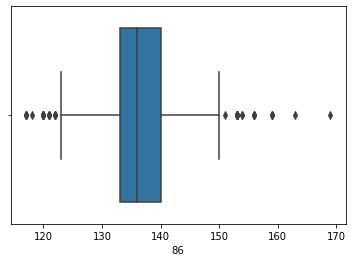

In [17]:
sns.boxplot(df['86'])

C:\Users\_\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='imputed_x'>

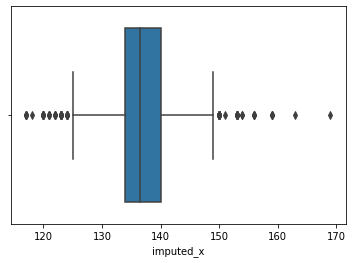

In [18]:
sns.boxplot(df['imputed_x'])